In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = "/content/gdrive/MyDrive/Praktikum_ML/Latihan3"

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


df = pd.read_csv(path + "/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Mentukan variabel independen (X) dan dependen (Y)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

print("Jumlah data:", len(df))


Jumlah data: 731


In [9]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data training:", len(X_train))
print("Data testing :", len(X_test))


Data training: 584
Data testing : 147


In [10]:
# Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Tampilkan koefisien model
print("Intercept :", model.intercept_)
print("Koefisien :", model.coef_)


Intercept : 1248.3209284778172
Koefisien : [  524.72253637  2023.99754659   -38.44465798  -391.55076626
    72.93700256   160.80489213  -632.8562835   2097.24783578
  3488.04217936  -865.43941913 -2080.54039519]


In [15]:
# Prediksi data test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score :", r2)
print("MAE      :", mae)
print("MSE      :", mse)
print("RMSE     :", rmse)


R² Score : 0.8276670090367212
MAE      : 617.3930656443376
MSE      : 691035.0082022651
RMSE     : 831.2851545662686


In [16]:
# Buat tabel hasil prediksi vs aktual
hasil = pd.DataFrame({
    "cnt_aktual": y_test,
    "cnt_prediksi": y_pred
})

# Tambahkan kolom selisih & akurasi
hasil["selisih_error"] = hasil["cnt_prediksi"] - hasil["cnt_aktual"]
denom = hasil["cnt_aktual"].replace(0, np.nan)
hasil["akurasi (%)"] = (1 - (hasil["selisih_error"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head(10)


,cnt_aktual,cnt_prediksi,selisih_error,akurasi (%)
703,6606,6220.416612,-385.583388,94.163134
33,1550,1571.605763,21.605763,98.606080
300,3747,3043.967028,-703.032972,81.237444
456,6041,4307.202484,-1733.797516,71.299495
633,7538,6765.659072,-772.340928,89.754034
557,7264,7231.536106,-32.463894,99.553085
39,1605,774.904147,-830.095853,48.280632
356,2209,2139.606601,-69.393399,96.858606
559,7499,7112.745605,-386.254395,94.849255
514,5743,6458.992169,715.992169,87.532785


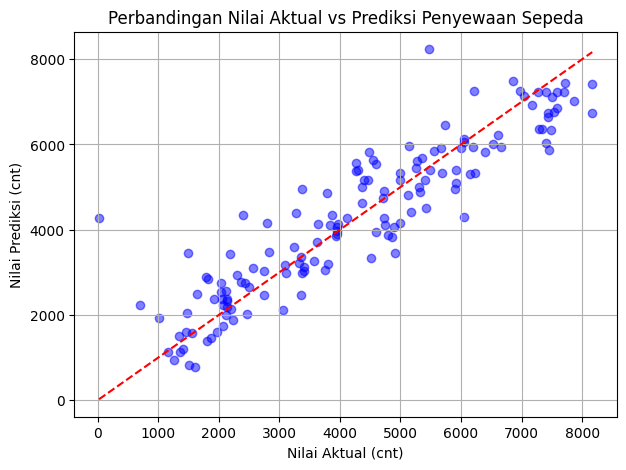

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi Penyewaan Sepeda")
plt.grid(True)
plt.show()
